#Mariz Essam Sobhy
#1808421
# Leaf Classification using 3 Layer Neural Network

## Part I: Data Preparation

In [1]:
#!pip install tensorflow==2.11.0

In [65]:
!unzip /content/images.zip

Archive:  /content/images.zip
replace images/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [66]:
import time
start = time.time()

In [67]:
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

In [103]:
import tensorflow as tf
print(tf.__version__)

2.11.0


### 1. Load Data

####  Read Data

In [69]:
df = pd.read_csv("train.csv",index_col=0)
parent_data = df.copy()
df.head (10)

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,0.003906,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,0.003906,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,0.048828,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,0.000000,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219


In [70]:
df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


#### Check for missing and duplicated data

In [71]:
df.isnull().sum().sum()

0

In [72]:
df.duplicated().sum()

0

#### Visualize - Draw Images

In [73]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt


images = []
files = glob.glob ("images/*.jpg")
for myFile in files:
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    images.append (image)

print('X_data shape:', np.array(images).shape)

X_data shape: (1584,)


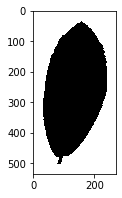

In [74]:
plt.figure(figsize=(3,3))
plt.imshow(images[0],cmap=plt.cm.gray_r, interpolation='nearest')
plt.imshow(images[2],cmap=plt.cm.gray_r, interpolation='nearest')
plt.imshow(images[34],cmap=plt.cm.gray_r, interpolation='nearest')

In [75]:
y = df.species.values

In [76]:
list_of_column_names = list(df.columns)
list_of_column_names.pop(0)

'species'

In [77]:
X= df[list_of_column_names].values
df = pd.DataFrame(X)
print(df.head())

        0         1         2         3         4         5         6    7    \
0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344  0.0   
1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531  0.0   
2  0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359  0.0   
3  0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438  0.0   
4  0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859  0.0   

        8         9    ...       182       183       184       185       186  \
0  0.001953  0.033203  ...  0.007812  0.000000  0.002930  0.002930  0.035156   
1  0.000000  0.007812  ...  0.000977  0.000000  0.000000  0.000977  0.023438   
2  0.000000  0.044922  ...  0.154300  0.000000  0.005859  0.000977  0.007812   
3  0.013672  0.017578  ...  0.000000  0.000977  0.000000  0.000000  0.020508   
4  0.000000  0.005859  ...  0.096680  0.000000  0.021484  0.000000  0.000000   

   187  188       189       190       

#### Correlation Analysis

In [78]:
cor_matrix = df.corr().abs()
print(cor_matrix)

          0         1         2         3         4         5         6    \
0    1.000000  0.806390  0.182829  0.297807  0.475874  0.767718  0.066273   
1    0.806390  1.000000  0.204640  0.315953  0.444312  0.825762  0.083273   
2    0.182829  0.204640  1.000000  0.120042  0.185007  0.163976  0.095449   
3    0.297807  0.315953  0.120042  1.000000  0.029480  0.261437  0.268271   
4    0.475874  0.444312  0.185007  0.029480  1.000000  0.438587  0.108178   
..        ...       ...       ...       ...       ...       ...       ...   
187  0.035072  0.081069  0.019850  0.052317  0.006542  0.066262  0.034094   
188  0.007581  0.007057  0.084957  0.320644  0.109229  0.050498  0.163375   
189  0.033159  0.037405  0.081999  0.073886  0.151675  0.031555  0.015391   
190  0.075171  0.098957  0.148193  0.050970  0.022299  0.132087  0.001364   
191  0.030414  0.029532  0.061780  0.014343  0.148834  0.003164  0.068512   

          7         8         9    ...       182       183       184  \
0  

In [79]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

     0        1         2         3         4         5         6         7    \
0    NaN  0.80639  0.182829  0.297807  0.475874  0.767718  0.066273  0.094137   
1    NaN      NaN  0.204640  0.315953  0.444312  0.825762  0.083273  0.086428   
2    NaN      NaN       NaN  0.120042  0.185007  0.163976  0.095449  0.024350   
3    NaN      NaN       NaN       NaN  0.029480  0.261437  0.268271  0.047693   
4    NaN      NaN       NaN       NaN       NaN  0.438587  0.108178  0.056557   
..   ...      ...       ...       ...       ...       ...       ...       ...   
187  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
188  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
189  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
190  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
191  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          8         9    ..

In [80]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


In [81]:
df1 = df.drop(df.columns[to_drop], axis=1)
print(); print(df1.head())


        0         1         2         3         4         5         6    7    \
0  0.007812  0.023438  0.023438  0.003906  0.011719  0.009766  0.027344  0.0   
1  0.005859  0.000000  0.031250  0.015625  0.025391  0.001953  0.019531  0.0   
2  0.005859  0.009766  0.019531  0.007812  0.003906  0.005859  0.068359  0.0   
3  0.000000  0.003906  0.023438  0.005859  0.021484  0.019531  0.023438  0.0   
4  0.005859  0.003906  0.048828  0.009766  0.013672  0.015625  0.005859  0.0   

        8         9    ...       182       183       184       185       186  \
0  0.001953  0.033203  ...  0.007812  0.000000  0.002930  0.002930  0.035156   
1  0.000000  0.007812  ...  0.000977  0.000000  0.000000  0.000977  0.023438   
2  0.000000  0.044922  ...  0.154300  0.000000  0.005859  0.000977  0.007812   
3  0.013672  0.017578  ...  0.000000  0.000977  0.000000  0.000000  0.020508   
4  0.000000  0.005859  ...  0.096680  0.000000  0.021484  0.000000  0.000000   

   187  188       189       190      

In [82]:
X= df1.values
print(X)
X.shape

[[0.007812 0.023438 0.023438 ... 0.004883 0.       0.025391]
 [0.005859 0.       0.03125  ... 0.000977 0.039062 0.022461]
 [0.005859 0.009766 0.019531 ... 0.       0.020508 0.00293 ]
 ...
 [0.001953 0.003906 0.       ... 0.027344 0.       0.001953]
 [0.       0.       0.046875 ... 0.       0.001953 0.00293 ]
 [0.023438 0.019531 0.03125  ... 0.023438 0.025391 0.022461]]


(990, 129)

In [83]:
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

### 2. Divide data to training and testing:

In [84]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, integer_encoded, test_size = 0.2, random_state = 1)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size = 0.25)

print(xTrain.shape)
print(xVal.shape)
print(xTest.shape)

(594, 129)
(198, 129)
(198, 129)


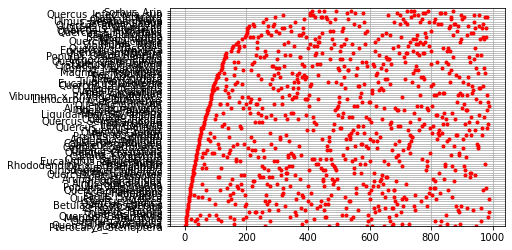

In [85]:
t=df.index.values
plt.plot(t,y,"r.")
ax = plt.gca()
ax.set_ylim([1,99])
plt.grid()

### 3. computing the mean and standard deviation

In [86]:
from sklearn import preprocessing 
#gets mean and std deviation
scaler = preprocessing.StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xVal = scaler.transform(xVal)
xTest = scaler.transform(xTest)

# print(xTrain, "\n")
# print(xVal, "\n")
# print(xTest, "\n")

print(scaler.mean_)

[0.01802526 0.02919821 0.03286445 0.02402277 0.01351398 0.03976947
 0.01942271 0.00110474 0.00677661 0.01853823 0.02486449 0.01135372
 0.04305425 0.00798669 0.01525668 0.00010193 0.01490489 0.0207807
 0.01241574 0.01343507 0.01871904 0.00570807 0.00097326 0.00760858
 0.00840101 0.01913009 0.00517869 0.01538163 0.02913244 0.01679221
 0.009371   0.00829253 0.01989618 0.00088115 0.01328383 0.01828502
 0.01659166 0.03073704 0.01462208 0.00767432 0.01063689 0.0176274
 0.01940956 0.01254727 0.02554184 0.00928547 0.02447977 0.0266598
 0.00731595 0.01390856 0.02661376 0.00232134 0.02390768 0.00906193
 0.01848889 0.00560283 0.0129024  0.02076096 0.0315393  0.01182391
 0.00125926 0.00461314 0.02565036 0.00398838 0.00074185 0.02298047
 0.01066001 0.00977715 0.0149033  0.02598585 0.00914584 0.01653253
 0.01834097 0.01520085 0.01993411 0.01849389 0.02493687 0.00925599
 0.01279559 0.01563324 0.0047365  0.01344671 0.00608628 0.02515553
 0.0135765  0.00310725 0.01295181 0.01582062 0.01013066 0.0100829

In [87]:
print(scaler.scale_)

[0.01973001 0.03826362 0.02628906 0.02951403 0.01763216 0.05287192
 0.01747504 0.00273627 0.00862293 0.01526631 0.02639819 0.01115913
 0.04854675 0.0133203  0.01408488 0.00107331 0.01057287 0.02218465
 0.0149942  0.00979502 0.01991135 0.00939099 0.00399605 0.01306553
 0.01205138 0.01274242 0.01044894 0.01422912 0.02235394 0.01742788
 0.01423249 0.01693817 0.01587909 0.00179378 0.01289314 0.01599334
 0.01136054 0.02329867 0.01326044 0.01003263 0.02444423 0.013963
 0.0210875  0.01180102 0.02335369 0.01212337 0.02145239 0.0292317
 0.01414987 0.01789232 0.02514529 0.00635208 0.01804946 0.01471772
 0.02215947 0.00841858 0.01005145 0.01818592 0.03220284 0.0125288
 0.00220919 0.0094083  0.01916428 0.00813861 0.00028364 0.04665551
 0.01529147 0.01270396 0.02133434 0.03785403 0.01923122 0.01994345
 0.02362381 0.02243842 0.03620619 0.03273087 0.06845388 0.01320755
 0.01813112 0.07582812 0.01224903 0.02391393 0.01453714 0.03477912
 0.0149436  0.01020383 0.02130415 0.02289175 0.01694454 0.01603464

### 4. One-hot Encoding of labels

In [88]:
encodedyTrain = to_categorical(yTrain)
print(encodedyTrain)
# invert encoding
inverted = argmax(encodedyTrain[34])
print("\n", inverted)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 2


## Part II: Training a neural network

In [89]:
!pip install --upgrade talos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
import talos as ta

number_of_classes = 99

# Hyperparameters Choices
p = {
    "hidden_nodes" : [20, 40, 50, 60, 90],
    "dropout_layer" : [0, 0.2, 0.5],
    "optimizers" : ["SGD", "adam", "rmsprop"],
    "batch_size" : [10, 15, 40],
    "epochs" : [40, 50, 70]
}

def model_scan(xTrain, yTrain, xVal, yVal, params):
    model = tf.keras.Sequential([
    tf.keras.Input(shape = (129,) ),
    tf.keras.layers.Dense(params["hidden_nodes"], activation='tanh'),
    tf.keras.layers.Dropout(params["dropout_layer"]),
    tf.keras.layers.Dense(number_of_classes, activation='softmax')])

    encodedyTrain = to_categorical(yTrain)
    encodedyVal = to_categorical(yVal)
    model.compile(loss='categorical_crossentropy', optimizer=params["optimizers"], metrics=['accuracy'])
    out = model.fit(xTrain, encodedyTrain, epochs=params["epochs"], batch_size=params["batch_size"], validation_data=[xVal, encodedyVal])

    return out, model

h = ta.Scan(xTrain, 
            yTrain,
            params = p,
            model = model_scan,
            experiment_name = "talos-scan",
            x_val = xVal,
            y_val = yVal,
            round_limit = 20,
            print_params = True,
            disable_progress_bar = True)


{'hidden_nodes': 50, 'dropout_layer': 0.5, 'optimizers': 'SGD', 'batch_size': 15, 'epochs': 70}
Epoch 1/70
40/40 [==============================] - 1s 11ms/step - loss: 4.8899 - accuracy: 0.0135 - val_loss: 4.7325 - val_accuracy: 0.0051
Epoch 2/70
40/40 [==============================] - 0s 5ms/step - loss: 4.7158 - accuracy: 0.0118 - val_loss: 4.6153 - val_accuracy: 0.0152
Epoch 3/70
40/40 [==============================] - 0s 5ms/step - loss: 4.5941 - accuracy: 0.0202 - val_loss: 4.5003 - val_accuracy: 0.0253
Epoch 4/70
40/40 [==============================] - 0s 5ms/step - loss: 4.4299 - accuracy: 0.0303 - val_loss: 4.3893 - val_accuracy: 0.0354
Epoch 5/70
40/40 [==============================] - 0s 5ms/step - loss: 4.3120 - accuracy: 0.0657 - val_loss: 4.2856 - val_accuracy: 0.0606
Epoch 6/70
40/40 [==============================] - 0s 4ms/step - loss: 4.1688 - accuracy: 0.0724 - val_loss: 4.1878 - val_accuracy: 0.0707
Epoch 7/70
40/40 [==============================] - 0s 4ms/step

In [92]:
# returns the results dataframe
r = ta.Reporting(h)
r.data

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,hidden_nodes,dropout_layer,optimizers,batch_size,epochs
0,12/11/22-204308,12/11/22-204329,20.906324,70,1.172842,0.868687,1.511123,0.747475,50,0.5,SGD,15,70
1,12/11/22-204330,12/11/22-204338,8.659048,70,2.500050,0.735690,2.959624,0.505050,40,0.0,SGD,40,70
2,12/11/22-204339,12/11/22-204344,5.575888,50,0.011645,1.000000,0.253406,0.929293,90,0.2,rmsprop,40,50
3,12/11/22-204344,12/11/22-204355,10.599257,50,0.351140,0.984848,0.638199,0.893939,60,0.5,rmsprop,15,50
4,12/11/22-204355,12/11/22-204407,11.533446,40,0.054375,1.000000,0.391797,0.919192,60,0.2,adam,10,40
5,12/11/22-204407,12/11/22-204412,5.562229,40,3.374600,0.282828,3.537667,0.313131,40,0.5,SGD,40,40
6,12/11/22-204413,12/11/22-204427,14.544638,70,0.001646,1.000000,0.271495,0.929293,50,0.0,rmsprop,15,70
7,12/11/22-204427,12/11/22-204438,10.705967,40,0.541027,0.981481,0.963583,0.848485,40,0.2,rmsprop,40,40
8,12/11/22-204438,12/11/22-204453,15.283897,50,1.002724,0.939394,1.572080,0.727273,40,0.0,SGD,10,50
9,12/11/22-204454,12/11/22-204515,20.931337,40,1.359152,0.885522,1.908710,0.666667,40,0.2,SGD,10,40


In [93]:
# Trying test data on the best model
"""
encodedyTest = to_categorical(yTest)
bestModel = h.best_model(metric='val_accuracy')
_, accuracy = bestModel.evaluate(xTest, encodedyTest)
print(accuracy)
e = ta.Evaluate(h)
# accuracy = e.evaluate(xTest, encodedyTest, task="multi_label", metric="val_loss")
evaluation = e.evaluate(xTest, 
                        encodedyTest, 
                        model_id=None,  
                        shuffle=True,
                        metric='val_accuracy', 
                        asc=True,
                        task='multi_label')
print(evaluation)
"""

'\nencodedyTest = to_categorical(yTest)\nbestModel = h.best_model(metric=\'val_accuracy\')\n_, accuracy = bestModel.evaluate(xTest, encodedyTest)\nprint(accuracy)\ne = ta.Evaluate(h)\n# accuracy = e.evaluate(xTest, encodedyTest, task="multi_label", metric="val_loss")\nevaluation = e.evaluate(xTest, \n                        encodedyTest, \n                        model_id=None,  \n                        shuffle=True,\n                        metric=\'val_accuracy\', \n                        asc=True,\n                        task=\'multi_label\')\nprint(evaluation)\n'

In [94]:
bestModel = h.best_model(metric='val_accuracy', asc=False)
encodedyVal = to_categorical(yVal)
encodedyTest = to_categorical(yTest)
bestModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bestModel.fit(xTrain, encodedyTrain, epochs=40, batch_size=15, validation_data=[xVal, encodedyVal])
_, accuracy = bestModel.evaluate(xTest, encodedyTest)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/40
40/40 [==============================] - 1s 7ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.3027 - val_accuracy: 0.9343
Epoch 2/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.9495
Epoch 3/40
40/40 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.2887 - val_accuracy: 0.9444
Epoch 4/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.2718 - val_accuracy: 0.9444
Epoch 5/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9444
Epoch 6/40
40/40 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2669 - val_accuracy: 0.9495
Epoch 7/40
40/40 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2663 - val_accuracy: 0.9444
Epoch 8/40
40/40 [==

In [95]:
test_df = pd.read_csv("test.csv")
test_df.head()
index = test_df.pop('id')

In [96]:
print(to_drop)
dongol= test_df[list_of_column_names].values
test_df = pd.DataFrame(dongol)
print(test_df.head())


[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
        0         1         2         3         4         5         6    7    \
0  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859  0.0   
1  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812  0.0   
2  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438  0.0   
3  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906  0.0   
4  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766  0.0   

        8         9    ...       182       183       184       185       186  \
0  0.005859  0.023438  ...  0.006836  0.000000  0.015625  0.000977  0.015625   
1  0.033203  0.023438  ...  0.000000  0.000000  0.006836  0.001953  0.013672  

In [97]:
df1_test = test_df.drop(df.columns[to_drop], axis=1)
print(); print(df1_test.head())


        0         1         2         3         4         5         6    7    \
0  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859  0.0   
1  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812  0.0   
2  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438  0.0   
3  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906  0.0   
4  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766  0.0   

        8         9    ...       182       183       184       185       186  \
0  0.005859  0.023438  ...  0.006836  0.000000  0.015625  0.000977  0.015625   
1  0.033203  0.023438  ...  0.000000  0.000000  0.006836  0.001953  0.013672   
2  0.011719  0.005859  ...  0.128910  0.000000  0.000977  0.000000  0.000000   
3  0.003906  0.001953  ...  0.012695  0.015625  0.002930  0.036133  0.013672   
4  0.005859  0.000000  ...  0.000000  0.042969  0.016602  0.010742  0.041016   

   187  188       189       190      

In [98]:
FinalX= df1_test.values
print(FinalX)
FinalX.shape

FinalX = scaler.transform(FinalX)
preds = bestModel.predict(FinalX)
preds.shape



[[0.019531 0.009766 0.078125 ... 0.       0.003906 0.053711]
 [0.007812 0.005859 0.064453 ... 0.000977 0.037109 0.044922]
 [0.       0.       0.001953 ... 0.015625 0.       0.      ]
 ...
 [0.017578 0.029297 0.015625 ... 0.       0.042969 0.006836]
 [0.013672 0.009766 0.060547 ... 0.       0.011719 0.018555]
 [0.       0.11719  0.       ... 0.015625 0.       0.017578]]
19/19 [==============================] - 0s 2ms/step


(594, 99)

In [99]:
preds = pd.DataFrame(preds,index=index,columns=sorted(parent_data.species.unique()))
print(preds)



      Acer_Capillipes  Acer_Circinatum     Acer_Mono   Acer_Opalus  \
id                                                                   
4        1.239803e-07     9.502125e-09  1.967693e-09  1.346034e-05   
7        5.337127e-08     2.286490e-08  2.322371e-06  3.504607e-07   
9        5.552583e-06     9.832920e-01  4.795681e-06  6.453304e-07   
12       6.638288e-07     3.916578e-04  2.265895e-05  5.555248e-07   
13       7.920812e-07     1.546713e-05  9.608691e-09  6.715542e-08   
...               ...              ...           ...           ...   
1576     5.749398e-06     9.985936e-01  2.004104e-06  1.369037e-07   
1577     2.999740e-07     2.105501e-08  6.896151e-10  2.665423e-06   
1579     3.183405e-04     2.755763e-06  2.936521e-05  1.546593e-07   
1580     5.031090e-07     7.602706e-07  5.000181e-05  7.979472e-06   
1583     1.263738e-08     1.622621e-05  1.772903e-06  3.889330e-07   

      Acer_Palmatum   Acer_Pictum  Acer_Platanoids   Acer_Rubrum  \
id                   

In [100]:
fp = open('submission__kaggle.csv','w')
fp.write(preds.to_csv())
end = time.time()
print(round((end-start),2), "seconds")

303.46 seconds


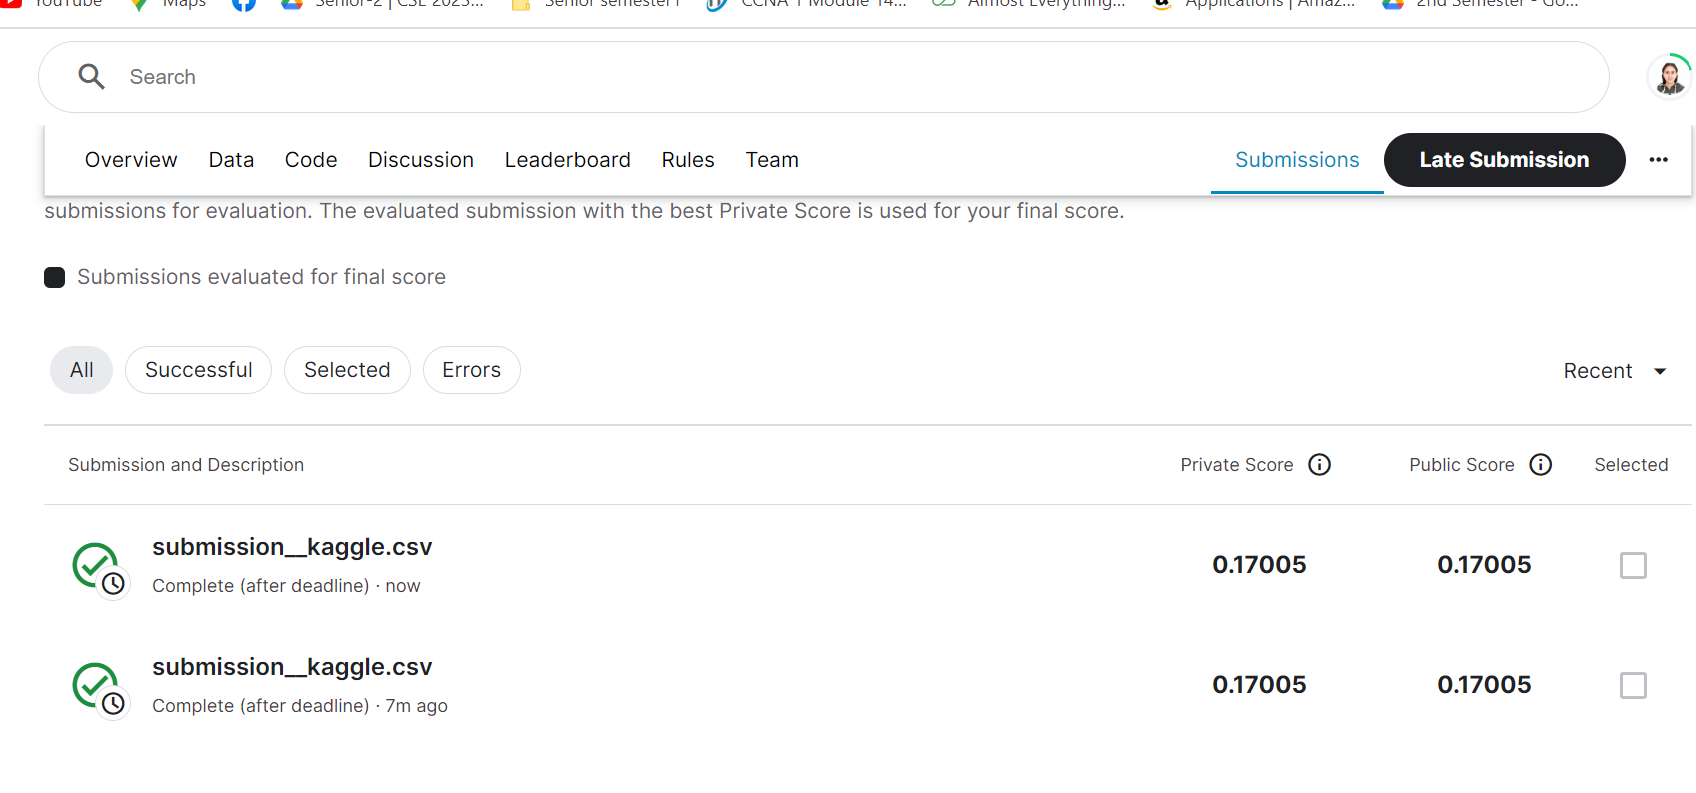

In [109]:
%%shell
jupyter nbconvert --to html '/content/withGridSearch&Validation.ipynb'

[NbConvertApp] Converting notebook /content/withGridSearch&Validation.ipynb to html
[NbConvertApp] Writing 777784 bytes to /content/withGridSearch&Validation.html
